In [2]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path
import gc
import os

INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [266]:
process_type='inter'

In [267]:
species="human"
SRP_name='aggregates'
resolution='1kbp_raw'
resolution_human=1000

In [195]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
        bins_bed['bin_id'] = bins_bed.index
        bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

        if species == 'human':

            df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        else:

            df_cre = pd.read_csv('/grid/gillis/data/lohia/ATAC_Risa/mm10-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        df_cre['start_bin'] = df_cre['start']/resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('int')
        df_cre['start_bin'] = df_cre['start_bin']*resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('str')
        df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
        #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
        df_cre['cre'] = 1
        df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
        df_cre_1kb_encode = df_cre.merge(bins_bed, left_on='start_bin', right_on='pos')

In [268]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
        bins_bed['bin_id'] = bins_bed.index
        bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

In [271]:
                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                        file_name = f'{resolution}/max/contact_top1/totg_reg_prior_only_top1_inter.csv'
        

In [272]:
df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')

In [273]:
df2

finite_bin  prior_val   bin_id
0             20980   0.000095        0
1             20980   0.000048        1
2             20980   0.000095        2
3             20980   0.000238        3
4             20980   0.000000        4
...             ...        ...      ...
2875007       22863   0.000131  2875007
2875008       22863   0.000175  2875008
2875009       22863   0.000000  2875009
2875010       22863   0.000219  2875010
2875011       22863   0.000175  2875011

[2875012 rows x 3 columns]

In [276]:
df3 = bins_bed.merge(df2)
#[['chr', 'start', 'end', ]]

In [294]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp = []
for resolution in [100]:
    if species == 'drosophila':
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/inter_only/'
    else:
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}kbp_raw/max/'
    for fname in ['hic_gene_corr_inter_excluding_intra_nanranked_ind_1_percent_per_chr.csv']:
        
        df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

        df['val'] = 1

        go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])

        go_table = go_table.fillna(0)

        go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])


        #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

        #df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
        
        df_hic_auc = df3


        go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id')
        GO_groups = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther.txt', sep=" ", names=["del","go_id"])
        GO_groups_des = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther_description.txt', sep=":", names=["del","des"])
        GO_groups_ben = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/aug4.GOslim', names=["go_id"])
        GO_groups_type = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther_process.txt', sep=" ", names=["del","type"])




        from scipy.stats import mannwhitneyu
        import scipy.stats as stats
        z_list = []
        z_p_dict = []
        des_list = []
        for go_id in GO_groups["go_id"].tolist():
            
         #if go_id in GO_groups_ben["go_id"].tolist():

            try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['prior_val'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['prior_val'].tolist()
                


                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)

                    #print (p, p_val)
            except:
                print (go_id)
                z_list.append(np.nan)
                z_p_dict.append(np.nan)


        auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list, GO_groups_des['des'].tolist(), GO_groups_type['type'].tolist())), columns=['id', 'P_val_agg', 'U1_stat', 'des', 'type'])
        auc_GO_terms_manw['species'] = species
        auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
        p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
        auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
        auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
        auc_GO_terms_manw_three_list_hic_exp.append(auc_GO_terms_manw)


KeyError: 'gene_id'

In [285]:
!pwd

/grid/gillis/home/lohia/notebooks_cre_v3


In [292]:
df3.sort_values(by='prior_val').head(100)[['chr', 'start', 'end', 'bin_id']].to_csv('/grid/gillis/home/lohia/notebooks_cre_v3/bottom100.bed', sep='\t', index=False, header=False)




<AxesSubplot:xlabel='prior_val', ylabel='Count'>

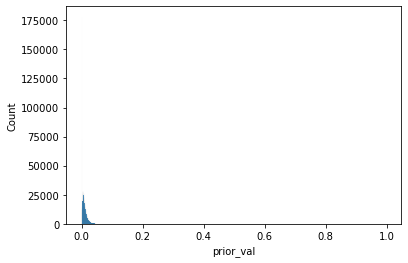

In [280]:
sns.histplot(df3['prior_val'])

In [196]:
def calc_auroc (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    rank_abs = lambda x: stats.rankdata(x)
    predicts2 = np.apply_along_axis(rank_abs, 0, df_trial[predicted_score].values)
    df_trial['p'] = [y if x==1 else 0 for x,y in zip(df_trial['true_pos'], predicts2)]
    #print (df_trial['p'].sum())
    if df_trial['true_neg'].sum() == 0 or df_trial['true_pos'].sum() == 0:
        return np.nan
    else:
        return (((df_trial['p'].sum() /df_trial['true_pos'].sum() )- (df_trial['true_pos'].sum() + 1)/2)) / df_trial['true_neg'].sum()

In [ ]:
prior_value_sum

In [300]:
    for species_list in [['human']]:
            if species_list == ['human']:
                color_1 = 'lightcyan'
                color_2 = '#129BD1'
                max_val=0.67
            res_list = [1]
            reversed_list = res_list[::-1]
            performance_type_list = ['totg_reg_prior_only_top1_inter.csv']
            df_list = []
            for species in species_list: 
                df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
                df_seq_depth['species'] = species
                df_list.append(df_seq_depth)
            import pandas as pd
            empty_list = []

            for species in species_list: 
                for resolution in res_list:

                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                        file_name = f'{resolution}kbp_raw/max/contact_top1/totg_reg_prior_only_top1_inter.csv'

                                        try:


                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2 = df2.merge(df_cre_1kb_encode, how='left')
                                            

                                            df2['cre'] = df2['cre'].fillna(0)

                                            df2['true_pos'] =  [1.0 if x>=1 else 0 for x in df2['cre']]
                                            print (df2['true_pos'].mean())

                                            df2['true_neg'] = [0 if x == 1.0 else 1.0 for x in df2['true_pos']]
                                            
                                            #df2['prior_val'] = prior_value_sum

                                            auc_t = calc_auroc(df2, predicted_score='prior_val')
                                            
                                            df2 = pd.DataFrame(columns = ['auc'])  
                                            df2['auc'] = [auc_t]
                                        
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file

                                            df2['species'] = species
                                            df2['resolution'] = resolution

                                            df2['agg_type'] = 'meta'
                                            df2['proj'] = 'all'


                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            empty_list.append(df2)

                                        except:
                                            continue

            df_whole_agg=pd.concat(empty_list)       
            df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
            print (df_whole_agg.groupby(['resolution'])['auc'].mean())

0.24565914855311907
resolution
1    0.635224
Name: auc, dtype: float64


In [251]:
df_whole_agg

auc species  resolution agg_type proj  counts_inter
0  0.635224   human           1     meta  all   96455324722

In [301]:
    for species_list in [['human']]:
            if species_list == ['human']:
                color_1 = 'lightcyan'
                color_2 = '#129BD1'
                max_val=0.67
            res_list = [1]
            reversed_list = res_list[::-1]
            performance_type_list = ['totg_reg_prior_only_top1_inter.csv']
            df_list = []
            for species in species_list: 
                df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
                df_seq_depth['species'] = species
                df_list.append(df_seq_depth)
            import pandas as pd
            empty_list = []

            for species in species_list: 
                for resolution in res_list:

                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                        file_name = f'{resolution}kbp_raw/max/contact_top1/totg_reg_prior_only_top1_inter.csv'

                                        try:


                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2 = df2.merge(df_cre_1kb_encode, how='left')

                                            df2['cre'] = df2['cre'].fillna(0)

                                            df2['true_pos'] =  [1.0 if x>=1 else 0 for x in df2['cre']]
                                            print (df2['true_pos'].mean())

                                            df2['true_neg'] = [0 if x == 1.0 else 1.0 for x in df2['true_pos']]

                                            auc_t = calc_auroc(df2, predicted_score='prior_val')
                                            
                                            df2 = pd.DataFrame(columns = ['auc'])  
                                            df2['auc'] = [auc_t]
                                        
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file

                                            df2['species'] = species
                                            df2['resolution'] = resolution

                                            df2['agg_type'] = 'meta'
                                            df2['proj'] = 'all'


                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            empty_list.append(df2)

                                        except:
                                            continue

            df_whole_agg=pd.concat(empty_list)       
            df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
            print (df_whole_agg.groupby(['resolution'])['auc'].mean())
            
            
    for species in species_list: 
        contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []
        counter = 0

        for proj in df_con['id'].tolist()[0:20]:
                                        counter = counter +1



                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/max/contact_top1/totg_reg_prior_only_top1_inter.csv'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2 = df2.merge(df_cre_1kb_encode, how='left')

                                            df2['cre'] = df2['cre'].fillna(0)

                                            df2['true_pos'] =  [1.0 if x>=1 else 0 for x in df2['cre']]

                                            df2['true_neg'] = [0 if x == 1.0 else 1.0 for x in df2['true_pos']]

                                            auc_t = calc_auroc(df2, predicted_score='prior_val')
                                            
                                            df2 = pd.DataFrame(columns = ['auc'])  
                                            df2['auc'] = [auc_t]
                                            print (auc_t)
                                        
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['proj'] = proj
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['tp_thesh'] == 2]
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
        
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]



        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]


        sc_bar = sns.scatterplot(data=dk[dk['resolution']==1], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        plt.plot()
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()
            


0.24565914855311907
resolution
1    0.635224
Name: auc, dtype: float64
0.6246643578801582
0.6161294489870032
0.6340915464116429
0.631696127470288
0.6221351161006523
0.6234118916889628
0.5117229003233262
0.657222410196667
0.6058311118763703
0.598509682328033
0.5375333202338022
SRP218691 1 12 SRP218691
SRP149906 1 13 SRP149906
SRP094854 1 14 SRP094854
SRP221518 1 15 SRP221518


KeyboardInterrupt: 

In [302]:
df_con['id'].tolist()

['SRP105082',
 'SRP012412',
 'SRP118999',
 'SRP050102',
 'SRP117084',
 'SRP152979',
 'SRP115572',
 'SRP216194',
 'SRP108500',
 'SRP212226',
 'SRP131871',
 'SRP218691',
 'SRP149906',
 'SRP094854',
 'SRP221518',
 'SRP141473',
 'SRP267107',
 'SRP234897',
 'SRP154953',
 'SRP133031',
 'SRP234115',
 'SRP152879',
 'SRP115913',
 'SRP224133',
 'SRP165933',
 'SRP114754',
 'SRP173234',
 'SRP106379',
 'SRP239849',
 'SRP160101',
 'SRP250333',
 'SRP233368',
 'SRP199225',
 'SRP157799',
 'SRP168606',
 'SRP162098',
 'SRP131003',
 'SRP120957',
 'SRP106040',
 'SRP186012',
 'ERP107279',
 'SRP212073',
 'SRP194362',
 'SRP170743',
 'SRP150629',
 'SRP135798',
 'SRP100408',
 'SRP223060',
 'SRP158276',
 'SRP150259',
 'SRP125488',
 'SRP110964',
 'DRP005173',
 'SRP250432',
 'SRP225696',
 'SRP201909',
 'SRP199098',
 'SRP186277',
 'SRP186190',
 'SRP184300',
 'SRP130935',
 'SRP158113',
 'SRP197114',
 'SRP157048',
 'SRP145420',
 'SRP113633',
 'SRP271101',
 'SRP162056',
 'SRP141229',
 'SRP113478',
 'SRP227918',
 'SRP1

<AxesSubplot:xlabel='log_contacts', ylabel='auc'>

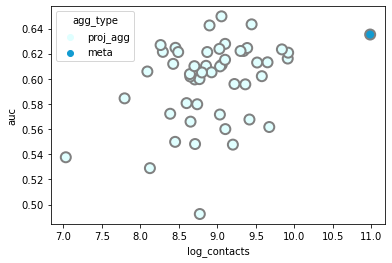

In [303]:
sns.scatterplot(data=dk[dk['resolution']==1], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})



In [305]:
dk.sort_values(by=['auc'])

proj  resolution  agg_type       auc  counts_inter  log_contacts  \
17  SRP133031           1  proj_agg  0.492525     591042632      8.771619   
10  SRP115572           1  proj_agg  0.528992     132903680      8.123537   
4   SRP100408           1  proj_agg  0.537642      10734504      7.030782   
6   SRP106040           1  proj_agg  0.547686    1589460650      9.201250   
26  SRP158276           1  proj_agg  0.548164     512694922      8.709859   
41  SRP223060           1  proj_agg  0.549886     282477152      8.450983   
19  SRP141473           1  proj_agg  0.560031    1267714410      9.103021   
22  SRP152879           1  proj_agg  0.561685    4717992990      9.673757   
11  SRP115913           1  proj_agg  0.565952     447962218      8.651241   
20  SRP149906           1  proj_agg  0.567656    2608729346      9.416429   
46  SRP239849           1  proj_agg  0.571620    1077624722      9.032468   
47  SRP250333           1  proj_agg  0.572226     243666942      8.386797   
16  SRP131871           1  proj_agg  0.579801     546862796      8.737878   
27  SRP160101           1  proj_agg  0.580691     397855762      8.599726   
21  SRP150629           1  proj_agg  0.584480      62302550      7.794506   
37  SRP212226           1  proj_agg  0.595628    2305027284      9.362676   
43  SRP233368           1  proj_agg  0.595885    1664460512      9.221273   
9   SRP114754           1  proj_agg  0.599513     508607976      8.706383   
18  SRP135798           1  proj_agg  0.599773     585379552      8.767438   
25  SRP157799           1  proj_agg  0.601875     444076294      8.647458   
24  SRP154953           1  proj_agg  0.602104    3777635932      9.577220   
34  SRP194362           1  proj_agg  0.603777     439616526      8.643074   
36  SRP212073           1  proj_agg  0.605064     630237068      8.799504   
28  SRP162098           1  proj_agg  0.605189     840189852      8.924377   
8   SRP108500           1  proj_agg  0.605831     123119904      8.090328   
32  SRP173234           1  proj_agg  0.609888    1082973944      9.034618   
48  SRP267107           1  proj_agg  0.610075     502487970      8.701126   
15  SRP131003           1  proj_agg  0.610357     711990832      8.852474   
30  SRP168606           1  proj_agg  0.611178    1138792074      9.056444   
45  SRP234897           1  proj_agg  0.611891     266536114      8.425756   
44  SRP234115           1  proj_agg  0.612965    3282665126      9.516227   
13  SRP118999           1  proj_agg  0.613137    4477597526      9.651045   
42  SRP224133           1  proj_agg  0.615152    1257810114      9.099615   
1   SRP012412           1  proj_agg  0.616129    8197215080      9.913666   
2   SRP050102           1  proj_agg  0.620798    8302243136      9.919195   
40  SRP221518           1  proj_agg  0.621294     309655002      8.490878   
31  SRP170743           1  proj_agg  0.621306     738008408      8.868061   
33  SRP186012           1  proj_agg  0.621432     195686728      8.291561   
12  SRP117084           1  proj_agg  0.622135    2185645872      9.339580   
39  SRP218691           1  proj_agg  0.622153    1998484964      9.300701   
23  SRP152979           1  proj_agg  0.623412    6886082828      9.837972   
7   SRP106379           1  proj_agg  0.623816    1061912766      9.026089   
29  SRP165933           1  proj_agg  0.624514    2437086938      9.386871   
5   SRP105082           1  proj_agg  0.624664     285392948      8.455443   
35  SRP199225           1  proj_agg  0.626869     182950354      8.262333   
0   ERP107279           1  proj_agg  0.627804    1260196942      9.100438   
0         all           1      meta  0.635224   96455324722     10.984326   
14  SRP120957           1  proj_agg  0.642453     790857054      8.898098   
3   SRP094854           1  proj_agg  0.643316    2782546408      9.444442   
38  SRP216194           1  proj_agg  0.649685    1129505102      9.052888   

      project   runs                             experiment type  \
17  SRP133031

In [210]:
sns.regplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc')


<AxesSubplot:xlabel='log_contacts', ylabel='auc'>

In [145]:
sns.scatterplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})



<AxesSubplot:xlabel='log_contacts', ylabel='auc'>

<AxesSubplot:>

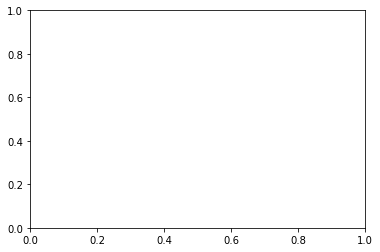

In [299]:
sns.scatterplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})


In [41]:
prior_df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/10kbp_raw/max/contact_top1/totg_reg_prior_only_top1_{process_type}.csv', sep='\t')




In [200]:
                df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
                df_seq_depth['species'] = species


In [177]:
species="human"
SRP_name='aggregates'
resolution='10kbp_raw'
resolution_human=10000

In [179]:
                df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
                df_seq_depth['species'] = species

In [180]:
    
        contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []
        empty_list_depth = []
        counter = 0

        for proj in df_con['id'].tolist():
                                        counter = counter +1



                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}/max/contact_top1/totg_reg_prior_only_top1_inter.csv'
                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        empty_list.append(df2['prior_val'].values)
                                        df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                        empty_list_depth.append(df_seq_depth_subset['counts_inter'].sum())
        prior_df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/contact_top1/totg_reg_prior_only_top1_{process_type}.csv', sep='\t')


        empty_list.append(prior_df['prior_val'].values)



In [184]:
p_a = np.array(empty_list[:-1])

In [264]:
abs(p_a.min())

0.0

In [265]:
p_a + abs(p_a.min())

array([[1.4299332e-03, 3.9084842e-03, 1.2869400e-03, ..., 8.5728030e-03,
        4.9862224e-03, 1.6620741e-03],
       [4.7664440e-05, 4.0991423e-03, 6.1963770e-04, ..., 1.1721997e-02,
        1.9245069e-03, 0.0000000e+00],
       [0.0000000e+00, 5.7197330e-03, 5.2430890e-04, ..., 1.7582994e-02,
        6.0359533e-03, 0.0000000e+00],
       ...,
       [5.1477600e-03, 8.8655865e-03, 5.7673976e-03, ..., 1.2990422e-02,
        6.7795130e-03, 5.5985656e-03],
       [8.7225930e-03, 9.5805530e-03, 9.4375590e-03, ..., 1.1197131e-02,
        9.5787950e-03, 9.0976680e-03],
       [7.3403240e-03, 9.6758820e-03, 7.4833175e-03, ..., 9.5787950e-03,
        8.3978480e-03, 7.7417660e-03]])

In [192]:
prior_value_sum = p_a.sum(axis=0)

In [64]:
    
        contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []
        empty_list_depth = []
        counter = 0

        for proj in df_con['id'].tolist():
                                        counter = counter +1



                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}/max/contact_top1/all_genes_prior_auc_inter.csv'
                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        #empty_list.append(bottleneck.mean(df2['auc'].values))
                                        empty_list.append(df2['auc'].mean())
                                        print (df2['auc'].max(), df2['auc'].min(), proj)
                                        df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                        empty_list_depth.append(df_seq_depth_subset['counts_inter'].sum())
        prior_df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/contact_top1/totg_reg_prior_auc_top1_inter.csv', sep='\t')


        #empty_list.append(bottleneck.meean(prior_df['auc'].values))
        empty_list.append(prior_df['auc'].mean())
        print (prior_df['auc'].max(), prior_df['auc'].min())
        
        

0.9979257667621008 0.564025536125476 SRP105082
0.9462183411175052 0.5461522698871696 SRP012412
0.9745665780059236 0.5254034245942951 SRP118999
0.9365270127772904 0.609898868492931 SRP050102
0.9788748661237244 0.5152319725121991 SRP117084
0.9706966927903792 0.5224122294275988 SRP152979
0.9999989765487972 0.6778595960825626 SRP115572
0.9901289754786976 0.5314597442514551 SRP216194
0.9995389864789388 0.5602800846422067 SRP108500
0.9836967730527372 0.6149281909720761 SRP212226
0.999116033190051 0.6460007934512113 SRP131871
0.981317882212925 0.5510104369563561 SRP218691
0.970098765350782 0.550977982150197 SRP149906
0.9765534529258224 0.6000053840779846 SRP094854
0.9967943656162024 0.5390595646621459 SRP221518
0.976174920589777 0.6197303758778608 SRP141473
0.996089467626776 0.5729330800457058 SRP267107
0.9981736074037848 0.5505015498576228 SRP234897
0.976715918506121 0.5389880022074311 SRP154953
0.9997192244350624 0.567149227455048 SRP133031
0.9904782697575548 0.5617686040064737 SRP234115
0.

In [203]:
species="human"
SRP_name='aggregates'
resolution='10kbp_raw'
resolution_human=10000

In [204]:
        df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
        df_seq_depth['species'] = species
        contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []
        empty_list_depth = []
        counter = 0

        for proj in df_con['id'].tolist():
                                        counter = counter +1



                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}/max/contact_top1/totg_reg_prior_auc_top1_inter.csv'
                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        #empty_list.append(bottleneck.mean(df2['auc'].values))
                                        empty_list.append(df2['auc'].mean())
                                        print (df2['auc'].mean(), proj)
                                        df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                        empty_list_depth.append(df_seq_depth_subset['counts_inter'].sum())
        prior_df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/contact_top1/totg_reg_prior_auc_top1_inter.csv', sep='\t')


        #empty_list.append(bottleneck.meean(prior_df['auc'].values))
        empty_list.append(prior_df['auc'].mean())
        print (prior_df['auc'].max(), prior_df['auc'].min())
        
        

0.6584653816690607 SRP105082
0.7401153730041792 SRP012412
0.7486647694407433 SRP118999
0.7484331268752606 SRP050102
0.7231196490586961 SRP117084
0.7380573006982419 SRP152979
0.6258878487769454 SRP115572
0.7143604127081862 SRP216194
0.6183116317305375 SRP108500
0.6860546504406269 SRP212226
0.6986652247211573 SRP131871
0.6853848855141297 SRP218691
0.7167094372395074 SRP149906
0.8023646832219273 SRP094854
0.6955652600325757 SRP221518
0.7081962340573759 SRP141473
0.6790332586025012 SRP267107
0.6693548419640599 SRP234897
0.6579649685551895 SRP154953
0.5658628934551981 SRP133031
0.7087813696196662 SRP234115
0.7908321794698334 SRP152879
0.691605142483958 SRP115913
0.7030083092155965 SRP224133
0.7777696296105545 SRP165933
0.7162077525615452 SRP114754
0.6518665406621853 SRP173234
0.6642752884669508 SRP106379
0.8210312752227403 SRP239849
0.6757541580637115 SRP160101
0.7421772158751473 SRP250333
0.6853496612330222 SRP233368
0.6263356691811698 SRP199225
0.6348662557566341 SRP157799
0.6709238844351

In [66]:
        prior_df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/contact_top1/totg_reg_prior_auc_top1_inter.csv', sep='\t')


        #empty_list.append(bottleneck.meean(prior_df['auc'].values))
        empty_list.append(prior_df['auc'].mean())
        print (prior_df['auc'].max(), prior_df['auc'].min())

0.9880642100852952 0.5016246144148652


In [67]:
prior_df['auc'].mean()

0.8337122858898207

In [247]:
# Create a sample dataframe
df = pd.DataFrame({
    'Group': [6, 1, 1,1],
    'Value': [6, 1,1,1],
    'Vale': [0, 5,2,3]
})
print (df)

# Define a function to shuffle rows in a group
def shuffle_group(group):
    return group.sample(frac=1).reset_index(drop=True)

# Shuffle groups of rows
shuffled_df = df.groupby('Group').apply(shuffle_group).reset_index(drop=True)

print(shuffled_df)

   Group  Value  Vale
0      6      6     0
1      1      1     5
2      1      1     2
3      1      1     3
   Group  Value  Vale
0      1      1     5
1      1      1     3
2      1      1     2
3      6      6     0


In [248]:
np.corrcoef(df.values)

array([[ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1.]])

In [219]:
df.values

array([[ 1,  1],
       [10, 10],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 8,  8],
       [ 0,  0]])

In [ ]:
my_vec.sample(frac=1).rank(method='first').reindex_like(my_vec)

In [15]:
df['Value']

0     1
1    10
2     1
3     1
4     1
5     1
6     1
7     8
8     9
Name: Value, dtype: int64

In [20]:
df['Value'].sample(frac=1).rank(method='first').reindex_like(df['Value'])

0    3.0
1    9.0
2    2.0
3    4.0
4    1.0
5    6.0
6    5.0
7    7.0
8    8.0
Name: Value, dtype: float64

In [24]:
rank_abs = lambda x: x.sample(frac=1).rank(method='first').reindex_like(x)
ranks = np.apply_along_axis(rank_abs, 1, df)

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [43]:
df.apply(lambda x: x.sample(frac=1).rank(method='first').reindex_like(x), axis=0).to_numpy()

array([[ 4.,  4.],
       [ 9.,  8.],
       [ 6.,  6.],
       [ 5.,  5.],
       [ 1.,  1.],
       [ 3.,  3.],
       [ 2.,  2.],
       [ 7.,  7.],
       [ 8., nan]])

In [44]:
[5,]

array([[1, 1],
       [2, 9],
       [3, 2],
       [4, 3],
       [5, 4],
       [6, 5],
       [7, 6],
       [8, 7],
       [9, 8]])

In [ ]:
my_vec.sample(frac=1).rank(method='first').reindex_like(my_vec)

In [ ]:
https://bamdev1.cshl.edu/jupyter/user/lohia/tree

In [90]:
prior_df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/contact_top1/totg_reg_prior_auc_top1_inter.csv', sep='\t')



In [91]:
prior_df['auc'].mean()

0.8337122858898207

In [ ]:
all_genes_prior_auc_inter.csv 

In [120]:
empty_list[-1]

0.8583431834173691

In [127]:
empty_list[-1]

0.8077527949130084

In [102]:
p_a = np.array(empty_list)

In [99]:
bottleneck.rankdata(p_a, axis=1)

array([[ 10051. ,  28286.5,  22923. , ..., 287386. , 287323.5, 287260. ],
       [ 10999.5,  84410.5,  27379.5, ..., 268325.5, 205697.5, 159060. ],
       [ 11338. , 119698. ,  27895. , ..., 280095.5, 259886. , 190761. ],
       ...,
       [ 14306. ,  14306. ,  14306. , ..., 287482. , 287482. , 287482. ],
       [ 11138. ,  60355.5,  26859. , ..., 287496. , 287489. , 287486.5],
       [ 11058.5, 221115. ,  32603.5, ..., 259544. , 188803.5,  34188. ]])

In [103]:
R1 = np.corrcoef(bottleneck.rankdata(p_a, axis=1))

In [92]:
res = stats.spearmanr(p_a)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [94]:
p_a

array([[0.0000000e+00, 6.6730217e-04, 9.5328880e-05, ..., 3.7606612e-01,
        3.6298823e-01, 3.5668984e-01],
       [0.0000000e+00, 3.0028600e-03, 3.8131553e-04, ..., 2.9786117e-02,
        1.0278616e-02, 6.3421247e-03],
       [0.0000000e+00, 2.6692087e-03, 2.8598667e-04, ..., 7.0375720e-02,
        2.5281021e-02, 6.2983860e-03],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.9973756e-01,
        9.9973756e-01, 9.9973756e-01],
       [0.0000000e+00, 1.0009533e-03, 1.9065777e-04, ..., 9.5678610e-01,
        9.5661110e-01, 9.5652366e-01],
       [0.0000000e+00, 8.7702570e-03, 8.1029550e-04, ..., 2.2131829e-02,
        5.6423040e-03, 9.1851460e-04]])

In [58]:
%matplotlib inline
import seaborn as sns

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

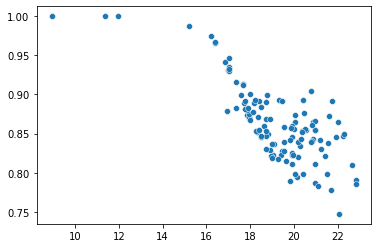

In [65]:
sns.scatterplot([np.log(x) for x in empty_list_depth], empty_list[0:-1])

In [249]:
ax = sns.scatterplot([np.log(x) for x in empty_list_depth]+[25], empty_list)
#ax.set_ylim([0.55,0.83])

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [296]:
ax = sns.scatterplot([np.log(x) for x in empty_list_depth], empty_list)

ValueError: arrays must all be same length

In [298]:
len(empty_list_depth)

119

In [206]:
ax = sns.scatterplot([np.log(x) for x in empty_list_depth], empty_list[:-1])
#ax.set_ylim([0.55,0.83])

In [208]:
max(empty_list[:-1])

0.8210312752227403

In [164]:
len(empty_list)

111

In [112]:
sns.lineplot([np.log(x) for x in empty_list_depth], bottleneck.median(R1, axis=1))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: arrays must all be same length

In [87]:
R1[0:-1].shape

(119, 120)

In [84]:
R1.mean(axis=1)

array([0.83044619, 0.39876772, 0.63385305, 0.50548585, 0.60364415,
       0.62129143, 0.79216102, 0.69663858, 0.80051331, 0.63664471,
       0.78763872, 0.58920932, 0.55062192, 0.53567737, 0.81035119,
       0.5453441 , 0.79937479, 0.83118387, 0.60533485, 0.78182783,
       0.72761681, 0.48511648, 0.81382249, 0.71110603, 0.60766135,
       0.7685493 , 0.69365551, 0.70771524, 0.48529337, 0.80703831,
       0.77036541, 0.67199624, 0.8142745 , 0.78852901, 0.71512243,
       0.68868761, 0.68071103, 0.72660845, 0.65095304, 0.82729812,
       0.69008774, 0.73720643, 0.81495891, 0.71016493, 0.792614  ,
       0.75965946, 0.76108516, 0.69921175, 0.65915508, 0.70209031,
       0.66088506, 0.72522673, 0.78608555, 0.7095568 , 0.82745748,
       0.80550103, 0.65520513, 0.7999432 , 0.73476773, 0.69973472,
       0.78923936, 0.71668813, 0.80085322, 0.78473547, 0.79587741,
       0.82077965, 0.80318497, 0.81670206, 0.79400348, 0.79428663,
       0.78322547, 0.80417574, 0.78542406, 0.79363178, 0.78978

In [65]:
R1.mean(axis=1)

array([0.6971794 , 0.58988423, 0.74367795, 0.66509222, 0.73725634,
       0.74903057, 0.54137395, 0.75067389, 0.56322037, 0.71436724,
       0.58461305])

In [28]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path
import gc
import os


def rank(data):
    """Rank normalize data
    
    Rank standardize inplace 
    Ignores Nans and replace with .5
    
    Does not return 
    Arguments:
        data {np.array} -- Array of data
    
    """
    #finite = np.isfinite(data)
    ranks = bottleneck.rankdata(data).astype(data.dtype)
    #print (ranks)

    #ranks -= 1
    #top = np.max(ranks).astype(data.dtype)
    #print (top)
    #ranks = ranks/top
    #data[...] = np.nan
    #np.putmask(data, finite, ranks)
    #del ranks, finite
    #gc.collect()
    return ranks

In [42]:
prior_df['prior_val'].values

array([0.        , 0.00877026, 0.0008103 , ..., 0.02213183, 0.0056423 ,
       0.00091851])

In [29]:
z= rank(prior_df['prior_val'].values)

In [43]:
bottleneck.nanrankdata(prior_df['prior_val'].values)

array([ 11058.5, 221115. ,  32603.5, ..., 259544. , 188803.5,  34188. ])

In [44]:
np.array([prior_df['prior_val'].values]*10)

array([[0.        , 0.00877026, 0.0008103 , ..., 0.02213183, 0.0056423 ,
        0.00091851],
       [0.        , 0.00877026, 0.0008103 , ..., 0.02213183, 0.0056423 ,
        0.00091851],
       [0.        , 0.00877026, 0.0008103 , ..., 0.02213183, 0.0056423 ,
        0.00091851],
       ...,
       [0.        , 0.00877026, 0.0008103 , ..., 0.02213183, 0.0056423 ,
        0.00091851],
       [0.        , 0.00877026, 0.0008103 , ..., 0.02213183, 0.0056423 ,
        0.00091851],
       [0.        , 0.00877026, 0.0008103 , ..., 0.02213183, 0.0056423 ,
        0.00091851]])

In [51]:
array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363]])
R1 = np.corrcoef(xarr)

NameError: name 'array' is not defined

In [14]:
given_top_fraction=1

In [15]:
    percentile_val = 100 - given_top_fraction
    my_percen = np.nanpercentile(ranks, percentile_val, axis=1, keepdims=True)

    my_data_thresh = ranks > my_percen
        
    #my_data_thresh = my_data_thresh.astype(int)

        
    tp  = my_data_thresh
    tp = tp.astype('float32')
    finite_ind =  finite
    tp[~finite_ind] = np.nan
    
    prior_val = bottleneck.nanmean(tp, axis=0)
    #prior_sum = bottleneck.nansum(tp, axis=0)
    finite_bin = finite_ind.sum(axis=0)
    
    df = pd.DataFrame(columns = ['finite_bin', 'prior_val', 'gene_id'])  
    df['finite_bin'] = finite_bin
    df['prior_val'] = prior_val
    df['gene_id'] = gene_list

ValueError: Length of values (23465) does not match length of index (5760)

In [42]:
species="human"
SRP_name='aggregates'
resolution='1kbp_raw'
resolution_human=1000

In [43]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
        bins_bed['bin_id'] = bins_bed.index
        bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

        if species == 'human':

            df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        else:

            df_cre = pd.read_csv('/grid/gillis/data/lohia/ATAC_Risa/mm10-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        df_cre['start_bin'] = df_cre['start']/resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('int')
        df_cre['start_bin'] = df_cre['start_bin']*resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('str')
        df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
        #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
        df_cre['cre'] = 1
        df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
        df_cre_1kb_encode = df_cre.merge(bins_bed, left_on='start_bin', right_on='pos')

In [68]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/1kbp_raw/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
        bins_bed['bin_id'] = bins_bed.index
        bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

        if species == 'human':

            df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        else:

            df_cre = pd.read_csv('/grid/gillis/data/lohia/ATAC_Risa/mm10-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        df_cre['start_bin'] = df_cre['start']/resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('int')
        df_cre['start_bin'] = df_cre['start_bin']*resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('str')
        df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']

In [69]:
df_cre

chr     start       end            t1            t2  \
0        chr1    104896    105048  EH38D4327509  EH38E2776520   
1        chr1    138866    139134  EH38D4327520  EH38E2776521   
2        chr1    181289    181639  EH38D4327525  EH38E2776524   
3        chr1    267925    268171  EH38D4327544  EH38E2776528   
4        chr1    586036    586264  EH38D4327554  EH38E2776532   
...       ...       ...       ...           ...           ...   
1063873  chrY  21252996  21253278  EH38D6144481  EH38E3951203   
1063874  chrY  21598449  21598656  EH38D6144550  EH38E3951229   
1063875  chrY  21839503  21839853  EH38D6144588  EH38E3951242   
1063876  chrY  26352857  26353207  EH38D4327371  EH38E3951251   
1063877  chrY  26353315  26353520  EH38D4327372  EH38E3951252   

                               t3      start_bin  
0            CTCF-only,CTCF-bound    chr1_104000  
1                 pELS,CTCF-bound    chr1_138000  
2        DNase-H3K4me3,CTCF-bound    chr1_181000  
3            CTCF-only,CTCF-bound    chr1_267000  
4            CTCF-only,CTCF-bound    chr1_586000  
...                           ...            ...  
1063873                      dELS  chrY_21252000  
1063874      CTCF-only,CTCF-bound  chrY_21598000  
1063875                      dELS  chrY_21839000  
1063876                      pELS  chrY_26352000  
1063877                      pELS  chrY_26353000  

[1063878 rows x 7 columns]

In [ ]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
        bins_bed['bin_id'] = bins_bed.index
        bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

        if species == 'human':

            df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        else:

            df_cre = pd.read_csv('/grid/gillis/data/lohia/ATAC_Risa/mm10-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        df_cre['start_bin'] = df_cre['start']/resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('int')
        df_cre['start_bin'] = df_cre['start_bin']*resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('str')
        df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']

In [50]:
    for species_list in [['human']]:
            if species_list == ['human']:
                color_1 = 'lightcyan'
                color_2 = '#129BD1'
                max_val=0.67
            res_list = [1]
            reversed_list = res_list[::-1]
            performance_type_list = ['totg_reg_prior_only_top1_inter.csv']
            df_list = []
            for species in species_list: 
                df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
                df_seq_depth['species'] = species
                df_list.append(df_seq_depth)
            import pandas as pd
            empty_list = []

            for species in species_list: 
                for resolution in res_list:

                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                        file_name = f'{resolution}kbp_raw/max/contact_top1/totg_reg_prior_only_top1_inter.csv'

                                        try:


                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2 = df2.merge(df_cre_1kb_encode, how='left')

                                            df2['cre'] = df2['cre'].fillna(0)

                                            df2['true_pos'] =  [1.0 if x>=1 else 0 for x in df2['cre']]

                                            df2['true_neg'] = [0 if x == 1.0 else 1.0 for x in df2['true_pos']]

                                            auc_t = calc_auroc(df2, predicted_score='prior_val')
                                            
                                            df2 = pd.DataFrame(columns = ['auc'])  
                                            df2['auc'] = auc_t
                                        
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file

                                            df2['species'] = species
                                            df2['resolution'] = resolution

                                            df2['agg_type'] = 'meta'
                                            df2['proj'] = 'all'


                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            empty_list.append(df2)

                                        except:
                                            continue

            df_whole_agg=pd.concat(empty_list)       
            df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
            print (df_whole_agg.groupby(['resolution'])['auc'].mean())
            

    for species in species_list: 
        contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []
        counter = 0

        for proj in df_con['id'].tolist():
                                        counter = counter +1



                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/max/contact_top1/totg_reg_prior_only_top1_inter.csv'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2 = df2.merge(df_cre_1kb_encode, how='left')

                                            df2['cre'] = df2['cre'].fillna(0)

                                            df2['true_pos'] =  [1.0 if x>=1 else 0 for x in df2['cre']]

                                            df2['true_neg'] = [0 if x == 1.0 else 1.0 for x in df2['true_pos']]

                                            auc_t = calc_auroc(df2, predicted_score='prior_val')
                                            
                                            df2 = pd.DataFrame(columns = ['auc'])  
                                            df2['auc'] = auc_t
                                        
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['proj'] = proj
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['tp_thesh'] == 2]
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
        
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]



        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]


        sc_bar = sns.scatterplot(data=dk[dk['resolution']==1], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        plt.plot()
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()


Series([], Name: auc, dtype: float64)
SRP105082 1 1 SRP105082
SRP012412 1 2 SRP012412
SRP118999 1 3 SRP118999
SRP050102 1 4 SRP050102
SRP117084 1 5 SRP117084
SRP216194 1 8 SRP216194
SRP108500 1 9 SRP108500
SRP212226 1 10 SRP212226
SRP131871 1 11 SRP131871
SRP149906 1 13 SRP149906
SRP094854 1 14 SRP094854
SRP221518 1 15 SRP221518
SRP141473 1 16 SRP141473
SRP267107 1 17 SRP267107
SRP234897 1 18 SRP234897
SRP154953 1 19 SRP154953
SRP133031 1 20 SRP133031
SRP234115 1 21 SRP234115
SRP160101 1 30 SRP160101
SRP250333 1 31 SRP250333
SRP233368 1 32 SRP233368
SRP199225 1 33 SRP199225


<ipython-input-50-188f7ff513c0>:120: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-50-188f7ff513c0>:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


NameError: name 'sns' is not defined

In [ ]:
                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2 = df2.merge(df_cre_1kb_encode, how='left')

                                            df2['cre'] = df2['cre'].fillna(0)

                                            df2['true_pos'] =  [1.0 if x>=1 else 0 for x in df2['cre']]

                                            df2['true_neg'] = [0 if x == 1.0 else 1.0 for x in df2['true_pos']]

                                            auc_t = calc_auroc(df2, predicted_score='prior_val')
                                            
                                            df2 = pd.DataFrame(columns = ['auc'])  
                                            df2['auc'] = auc_t
                                        
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file

                                            df2['species'] = species
                                            df2['resolution'] = resolution

                                            df2['agg_type'] = 'meta'
                                            df2['proj'] = 'all'

In [ ]:
species="human"
SRP_name='aggregates'
resolution='1kbp_raw'
resolution_human=1000

In [44]:
df_prior_only=pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/contact_top1/totg_reg_prior_only_top1_inter.csv', sep='\t')
            
            

df_cre_tog = df_prior_only.merge(df_cre_1kb_encode, how='left')

df_cre_tog['cre'] = df_cre_tog['cre'].fillna(0)

df_cre_tog['true_pos'] =  [1.0 if x>=1 else 0 for x in df_cre_tog['cre']]

df_cre_tog['true_neg'] = [0 if x == 1.0 else 1.0 for x in df_cre_tog['true_pos']]

calc_auroc(df_cre_tog, predicted_score='prior_val')

In [34]:
def calc_auroc (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    rank_abs = lambda x: stats.rankdata(x)
    predicts2 = np.apply_along_axis(rank_abs, 0, df_trial[predicted_score].values)
    df_trial['p'] = [y if x==1 else 0 for x,y in zip(df_trial['true_pos'], predicts2)]
    #print (df_trial['p'].sum())
    if df_trial['true_neg'].sum() == 0 or df_trial['true_pos'].sum() == 0:
        return np.nan
    else:
        return (((df_trial['p'].sum() /df_trial['true_pos'].sum() )- (df_trial['true_pos'].sum() + 1)/2)) / df_trial['true_neg'].sum()